## Prices exploration

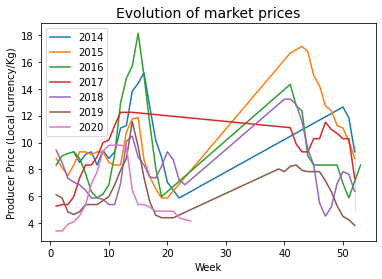

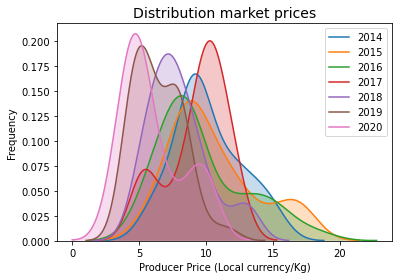

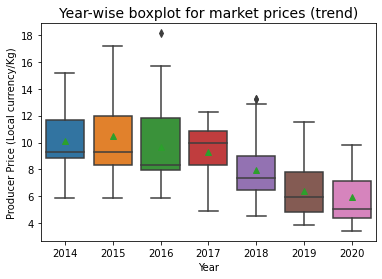

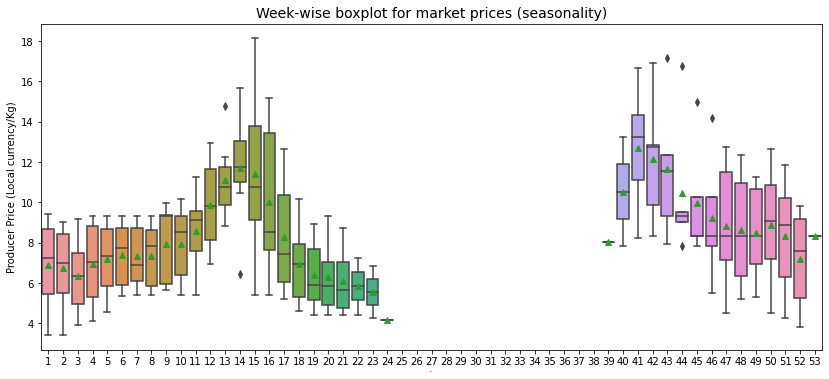

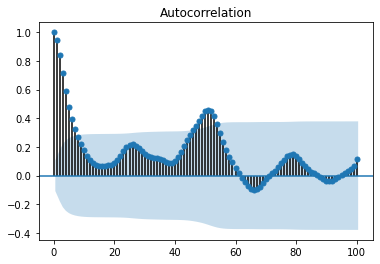

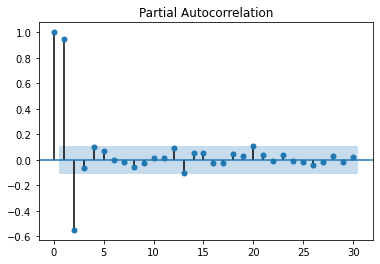

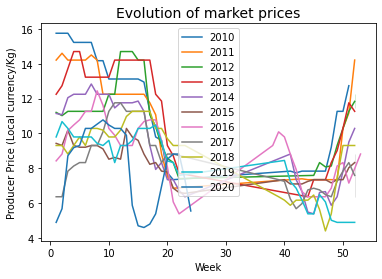

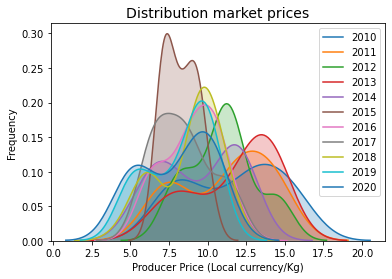

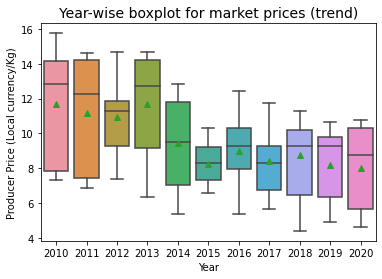

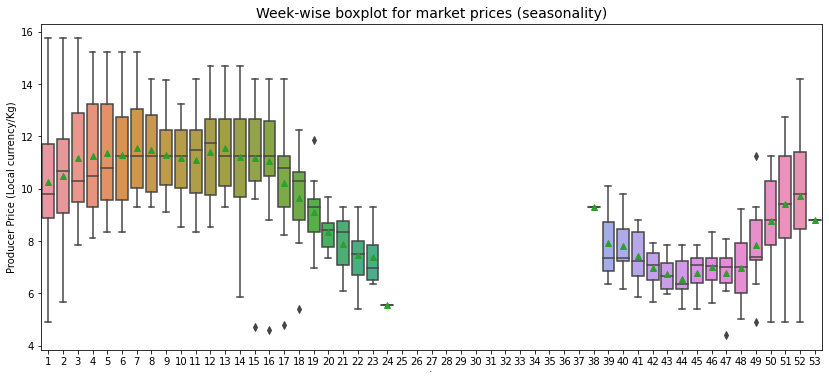

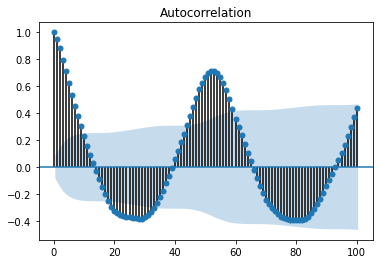

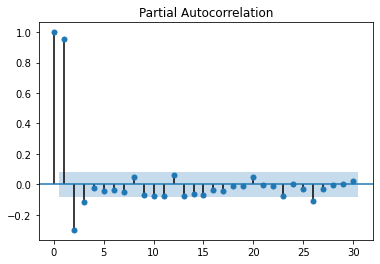

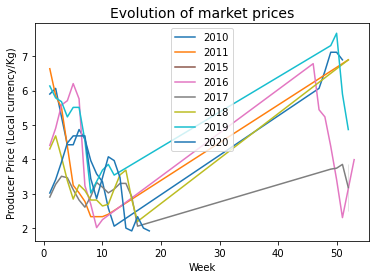

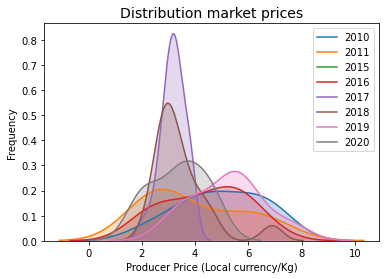

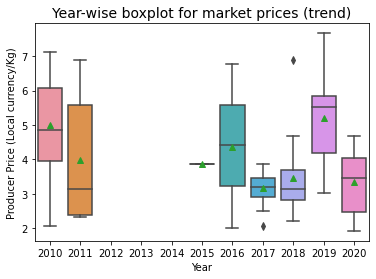

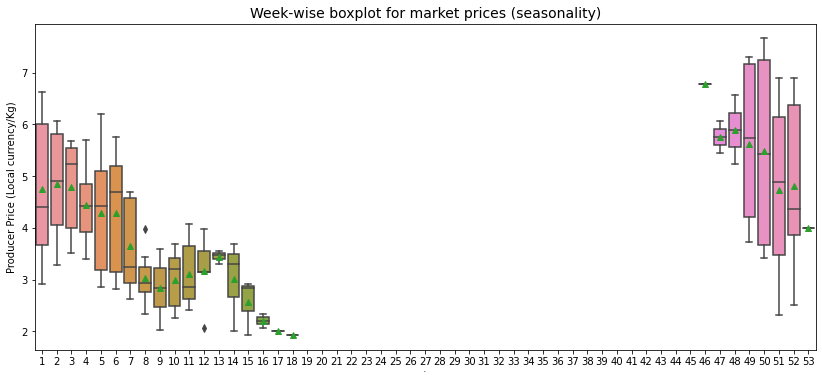

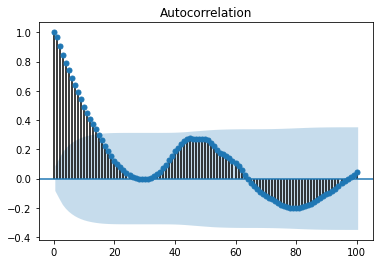

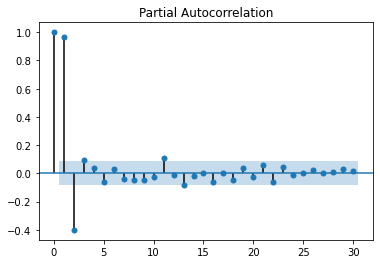

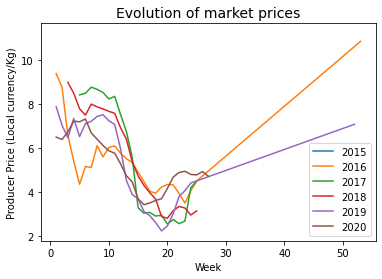

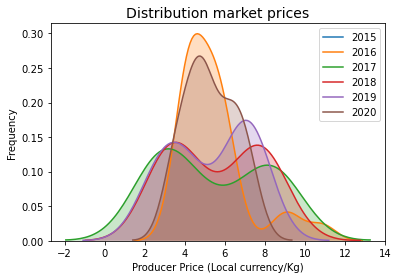

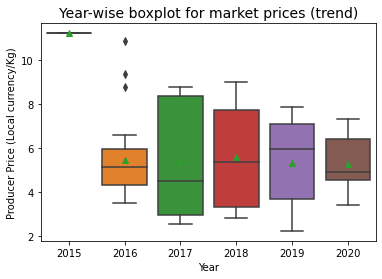

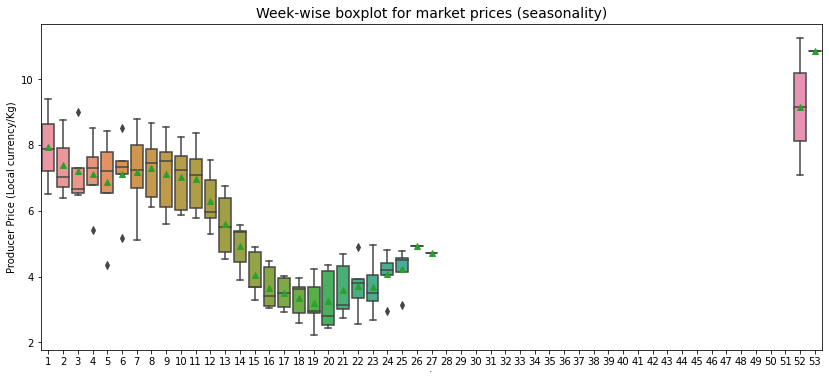

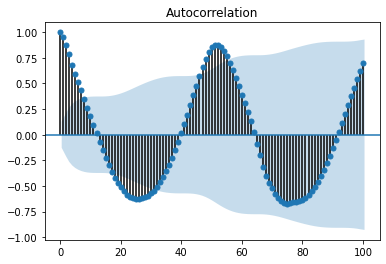

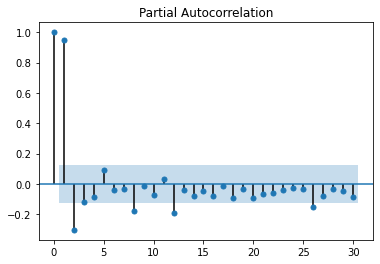

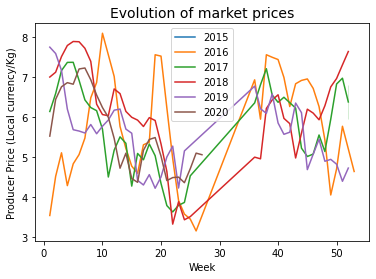

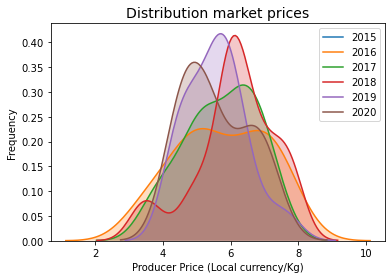

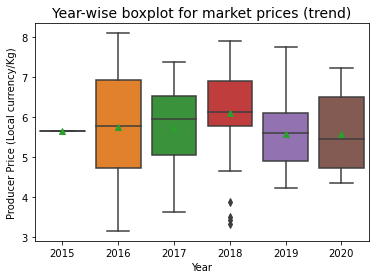

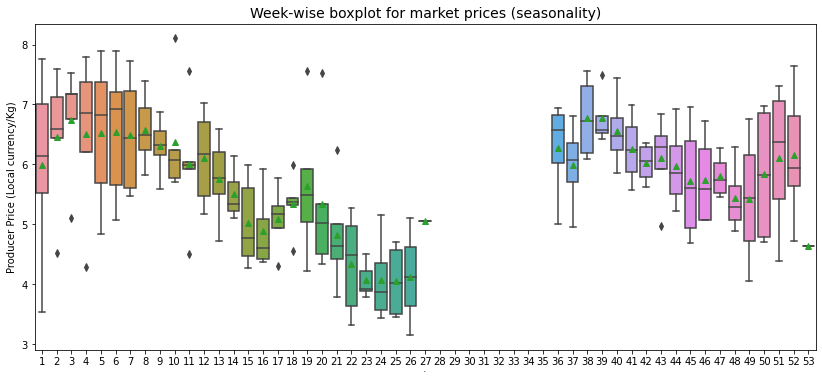

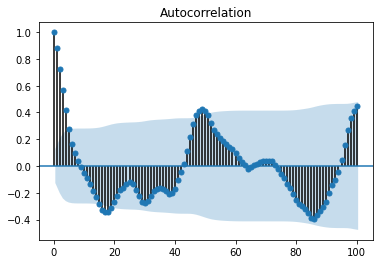

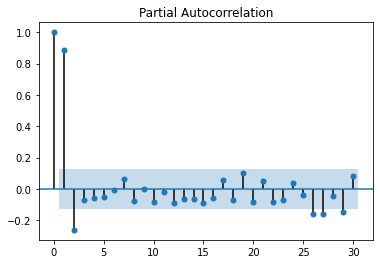

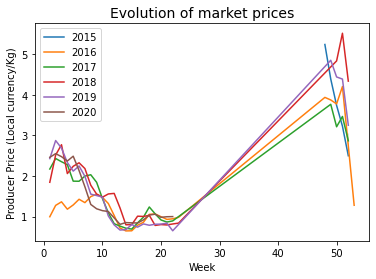

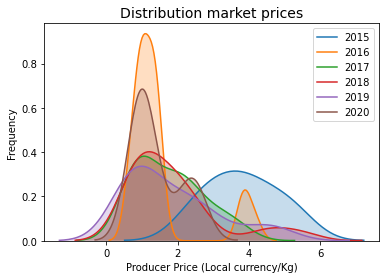

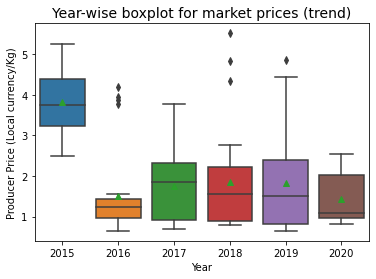

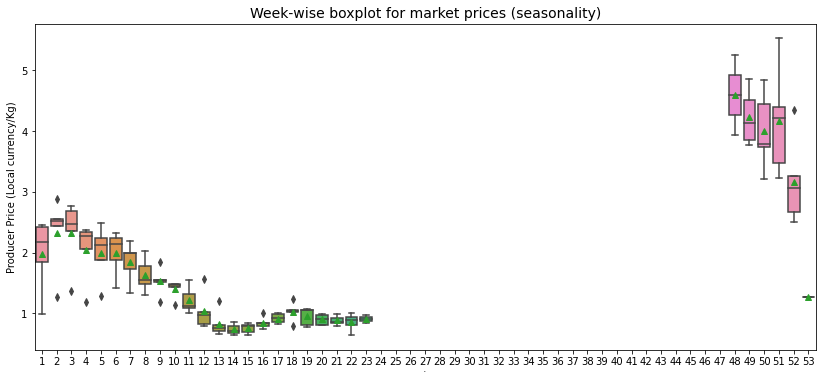

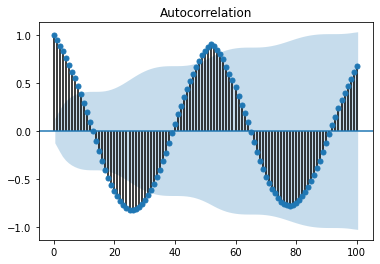

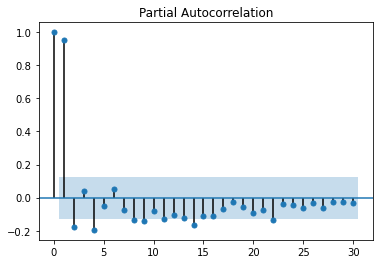

In [9]:
def plotting_analysis(df_prices, df_prices_full, desc):

    # https://www.machinelearningplus.com/time-series/time-series-analysis-python/#:~:text=Time%20series%20is%20a%20sequence,in%20Python%20%E2%80%93%20A%20Comprehensive%20Guide.

    import matplotlib.pyplot as plt
    from matplotlib.backends.backend_pdf import PdfPages
    import seaborn as sns
    import pandas as pd

    crop = conf.crop_list_arima[id-1]
    pp = PdfPages(f'../../data/02_intermediate/exloratory_analysis/{desc}.pdf')

    crop = ''

    df_prices['Week'] = df_prices.index.week
    df_prices['Year'] = df_prices.index.year

    # Evolution (line graph)
    plot1 = plt.figure()
    for i in list(df_prices.index.year.drop_duplicates()):
        data_graph = df_prices[df_prices.index.year == i]
        ax = sns.lineplot(x='Week',y='Price',data=data_graph, label=i)
    plt.title('Evolution of market prices', fontsize=14)
    plt.xlabel('Week', fontsize=10)
    plt.ylabel('Producer Price (Local currency/Kg)', fontsize=10)
    plt.savefig(f'../../data/02_intermediate/exloratory_analysis/{desc}_evolution.png')
    pp.savefig(plot1)

    # Distribution univariate kernel density estimate)
    plot2 = plt.figure()
    for i in list(df_prices.index.year.drop_duplicates()):
        data_graph = df_prices[df_prices.index.year == i]
        ax = sns.kdeplot(data_graph['Price'].dropna(),label=i, shade=True)
    plt.title('Distribution market prices', fontsize=14)
    plt.xlabel('Producer Price (Local currency/Kg)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.savefig(f'../../data/02_intermediate/exloratory_analysis/{desc}_distribution.png')
    pp.savefig(plot2)

    # Boxplot for years
    plot3 = plt.figure()
    ax = sns.boxplot(x="Year", y="Price",data=df_prices, showmeans=True)
    plt.title('Year-wise boxplot for market prices (trend)', fontsize=14)
    plt.xlabel('Year', fontsize=10)
    plt.ylabel('Producer Price (Local currency/Kg)', fontsize=10)
    plt.savefig(f'../../data/02_intermediate/exloratory_analysis/{desc}_boxplot_years.png')
    pp.savefig(plot3)

    # Boxplot for weeks
    plot4 = plt.figure(figsize=(14,6))
    ax = sns.boxplot(x="Week", y="Price",data=df_prices, showmeans=True)
    plt.title('Week-wise boxplot for market prices (seasonality)', fontsize=14)
    plt.xlabel('Week', fontsize=1)
    plt.ylabel('Producer Price (Local currency/Kg)', fontsize=10)
    plt.savefig(f'../../data/02_intermediate/exloratory_analysis/{desc}_boxplot_weeks.png')
    pp.savefig(plot4)

    # ACF correlation
    from statsmodels.graphics.tsaplots import plot_acf
    acf(df_prices_full)
    plot5 = plot_acf(df_prices_full,lags=100,unbiased=True)
    plot5.savefig(f'../../data/02_intermediate/exloratory_analysis/{desc}_acf.png')
    pp.savefig(plot5)
    
    from statsmodels.tsa.stattools import pacf
    from statsmodels.graphics.tsaplots import plot_pacf
    plot6 = plot_pacf(df_prices_full, lags = 30)
    plot6.savefig(f'../../data/02_intermediate/exloratory_analysis/{desc}_pacf.png')
    pp.savefig(plot6)

    # Correlation between related campaign weeks
    for y in range(2017,2020):
        c = df_prices_full[df_prices_full.index.year==y]['Price'].reset_index()['Price'][0:21].corr(df_prices_full[df_prices_full.index.year==y+1].reset_index()['Price'][0:21])
        print(f'Correlations between campaigns {y} and {y+1}: {c}')


    pp.close()

In [10]:
import sys
sys.path.insert(0, '../../src')
#   https://realpython.com/python-modules-packages/
sys.path.append('../../src/d00_utils')
sys.path.append('../../src/d01_data')
sys.path.append('../../src/d02_processing')
sys.path.append('../../src/d03_modelling')
import extractions as extract
import transformations as transf
import training as train
import import_data as imp
import inference as inf
import time  
from dateutil.relativedelta import relativedelta
from datetime import date
import config as conf
import pandas as pd
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

crop_list = conf.crop_list_arima
df_prices = pd.DataFrame()

for i in range(0, len(crop_list)):
    
    crop = crop_list[i][0]
    ctry = crop_list[i][1]
    trade_ctry = crop_list[i][2]
    ctgr = crop_list[i][3]
    mdel = crop_list[i][4]
    regn = crop_list[i][5]
    pkge = crop_list[i][6]
    crcy = crop_list[i][7]
    msre = crop_list[i][8]
    exog = crop_list[i][9]

    app = extract.get_prices(crop,ctry,trade_ctry,ctgr)
    app['ID'] = i+1
    df_prices = df_prices.append(app)

for i in range(1,len(crop_list)+1):

    id = i
    crop = conf.crop_list_arima[id-1]
    desc = conf.crop_list_arima[id-1]
    desc = [str(i) for i in crop[:-6]]
    desc = ("_".join(desc))
    print(desc)

    df_prices_call = df_prices[df_prices.ID == id][['Date_price', 'Price']]
    df_prices_call.set_index('Date_price',inplace=True)
    df_prices_call.sort_index(inplace=True)
    df_prices_call.index = df_prices_call.index.astype('datetime64[ns]') 
    df_prices_call = df_prices_call.resample('W').mean().asfreq('W')
    rows_null = df_prices_call.isnull()
    idx_null = rows_null[rows_null.any(axis=1)].index
    df_prices_full = df_prices_call.interpolate()

    plotting_analysis(df_prices_call, df_prices_full, desc)

BLUEBERRIES_US_MX_std
Correlations between campaigns 2017 and 2018: 0.2910715055660707
Correlations between campaigns 2018 and 2019: 0.4419987954438091
Correlations between campaigns 2019 and 2020: 0.35881556747743104
RASPBERRIES_US_MX_std
Correlations between campaigns 2017 and 2018: 0.8055163834998883
Correlations between campaigns 2018 and 2019: 0.1824824365207478
Correlations between campaigns 2019 and 2020: -0.5564366573792663
STRAWBERRIES_US_MX_med
Correlations between campaigns 2017 and 2018: 0.30690034631789537
Correlations between campaigns 2018 and 2019: 0.6153719400606437
Correlations between campaigns 2019 and 2020: 0.40033826677071016
BLUEBERRIES_ES_ES_std
Correlations between campaigns 2017 and 2018: 0.9376890060190678
Correlations between campaigns 2018 and 2019: 0.9601055650746388
Correlations between campaigns 2019 and 2020: 0.9115283491861004
RASPBERRIES_ES_ES_std
Correlations between campaigns 2017 and 2018: 0.8414587707548656
Correlations between campaigns 2018 and 